<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n20.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

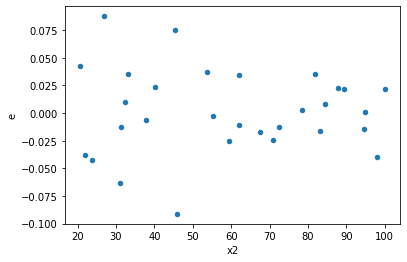

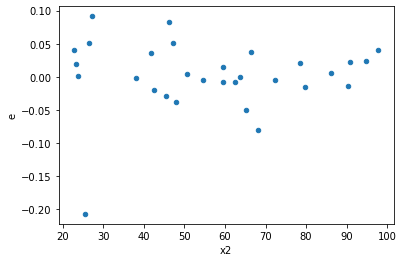

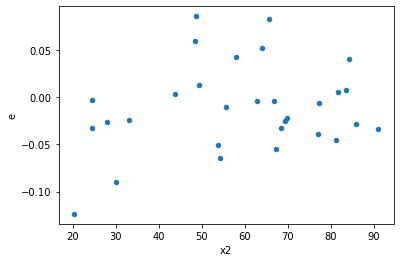

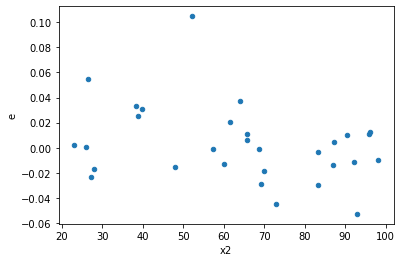

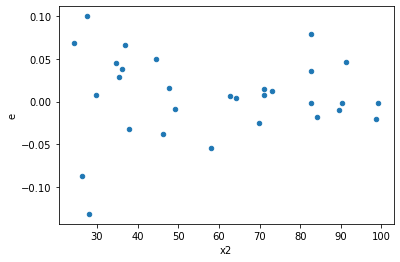

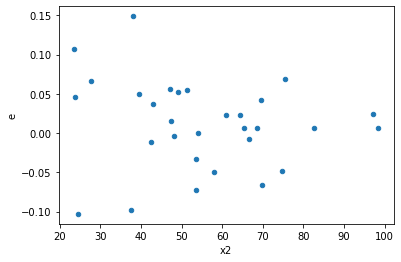

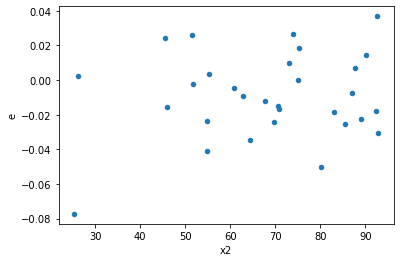

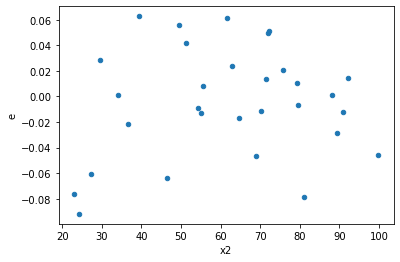

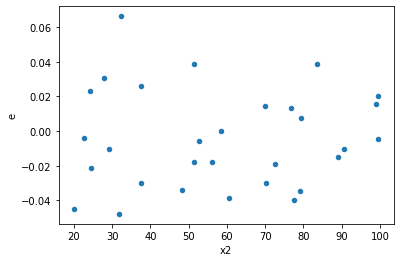

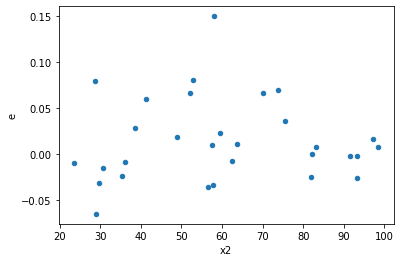

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
24.0,10.0,10.0,0.015856877206460344,0.016002975927111526,0.0015856877206460343,0.0016002975927111526,1.009213587186742,0.9887152731580939,0.505642363420953,0.49435763657904697,Reject001=1 : Homoscedasticity
45.0,10.0,10.0,0.010948489317833137,0.011726059053741423,0.0010948489317833137,0.0011726059053741424,1.0710207329372614,0.9157401833055445,0.5421299083472277,0.45787009165277226,Reject001=1 : Homoscedasticity
81.0,10.0,10.0,0.005286285753304667,0.009463222459245427,0.0005286285753304667,0.0009463222459245426,1.7901458416865925,0.3724279165880049,0.8137860417059976,0.18621395829400245,Reject001=1 : Homoscedasticity
90.0,10.0,10.0,0.011637565758522112,0.01303193641670136,0.0011637565758522111,0.001303193641670136,1.1198163505248648,0.8614935903958751,0.5692532048020624,0.43074679519793757,Reject001=1 : Homoscedasticity
108.0,10.0,10.0,0.006639217503574456,0.007639524878801573,0.0006639217503574456,0.0007639524878801573,1.1506664565046358,0.82872047291991,0.585639763540045,0.414360236459955,Reject001=1 : Homoscedasticity
118.0,10.0,10.0,0.01570615343608655,0.01577849871154539,0.001570615343608655,0.001577849871154539,1.0046061739911836,0.9943453099895612,0.5028273450052194,0.4971726549947806,Reject001=1 : Homoscedasticity
208.0,10.0,10.0,0.01136990781217842,0.013679237060613894,0.001136990781217842,0.0013679237060613895,1.2031088806157189,0.7756729062973666,0.6121635468513167,0.3878364531486833,Reject001=1 : Homoscedasticity
307.0,10.0,10.0,0.00615831081497439,0.007594628587233506,0.0006158310814974391,0.0007594628587233506,1.233232426133251,0.7466879037768401,0.6266560481115799,0.37334395188842007,Reject001=1 : Homoscedasticity
316.0,10.0,10.0,0.01693043360254357,0.022958367700013055,0.001693043360254357,0.0022958367700013057,1.3560413300084573,0.6392004944111207,0.6803997527944396,0.31960024720556035,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.026901263938484275,0.004300112904600767,0.0026901263938484275,0.00043001129046007667,0.15984798760511518,0.007713923682995296,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,0.06441725748848195,0.006523840113287764,0.006441725748848196,0.0006523840113287765,0.10127472617806263,0.0012062586997030032,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,0.026873801971563294,0.005500041679913773,0.0026873801971563295,0.0005500041679913773,0.20466183704611954,0.019459504665442818,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,0.013332056233082878,0.004011698269570039,0.0013332056233082879,0.0004011698269570039,0.3009061917707185,0.07156690748265726,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,0.04585658839721797,0.00454150458853603,0.004585658839721797,0.00045415045885360296,0.09903712306717423,0.0010970219935330467,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,0.052623644899121004,0.014403886228026491,0.005262364489912101,0.0014403886228026492,0.2737151000398888,0.05288979234591192,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,0.008669669757469725,0.006016549384414997,0.0008669669757469725,0.0006016549384414997,0.6939767664427104,0.5742085076195134,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,0.01746445425950288,0.008965286659918019,0.0017464454259502877,0.0008965286659918019,0.5133447931841195,0.3080727390009878,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,0.00910375341190327,0.003562913797535547,0.0009103753411903269,0.00035629137975355473,0.39136756416062346,0.15500104330558112,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      639
Reject001=0 : Heteroscedasticity    361
Name: Result_test, dtype: int64